In [67]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# parse_dates to parse dates in dataset without transformation
# setting date as the index
df_train = pd.read_csv("dataset/train.csv", parse_dates = True, index_col = 'Date')

df_store = pd.read_csv("dataset/store.csv")

In [3]:
df_train.head() # date based indexing

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


Sales: the turnover for any given day (target variable). <br>
Customers: the number of customers on a given day. <br>
Open: an indicator for whether the store was open: 0 = closed, 1 = open.<br>
Promo: indicates whether a store is running a promo on that day. <br>
StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. <br>
SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools. <br>

In [4]:
df_train.shape, df_store.shape

((1017209, 8), (1115, 10))

## Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
# df_train.describe()

### Extract dates for analysis

In [7]:
df_train['Year'] = df_train.index.year
df_train['Month'] = df_train.index.month
df_train['Day'] = df_train.index.day
df_train['WeekOfYear'] = df_train.index.weekofyear

In [8]:
# capture the average sales per customer using a new feature

df_train['SalesPerCustomer'] = df_train['Sales']/df_train['Customers']
df_train['SalesPerCustomer'].describe

<bound method NDFrame.describe of Date
2015-07-31     9.482883
2015-07-31     9.702400
2015-07-31    10.126675
2015-07-31     9.342457
2015-07-31     8.626118
                ...    
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
2013-01-01          NaN
Name: SalesPerCustomer, Length: 1017209, dtype: float64>

In [9]:
df_train.head().append(df_train.tail())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,1,NaN
2013-01-01,1114,2,0,0,0,0,a,1,2013,1,1,1,NaN


### It can be infered that on an average a customer spends $9.50 per day 

### Handling continuous variables

#### to visualise the distribution of the continuous varibales we will use ECDF method

ECDF: Empirical Cumulative Distribution Function <br>

We will consider the following variables:
1. Sales
2. Customer
3. SalesPerCustomer

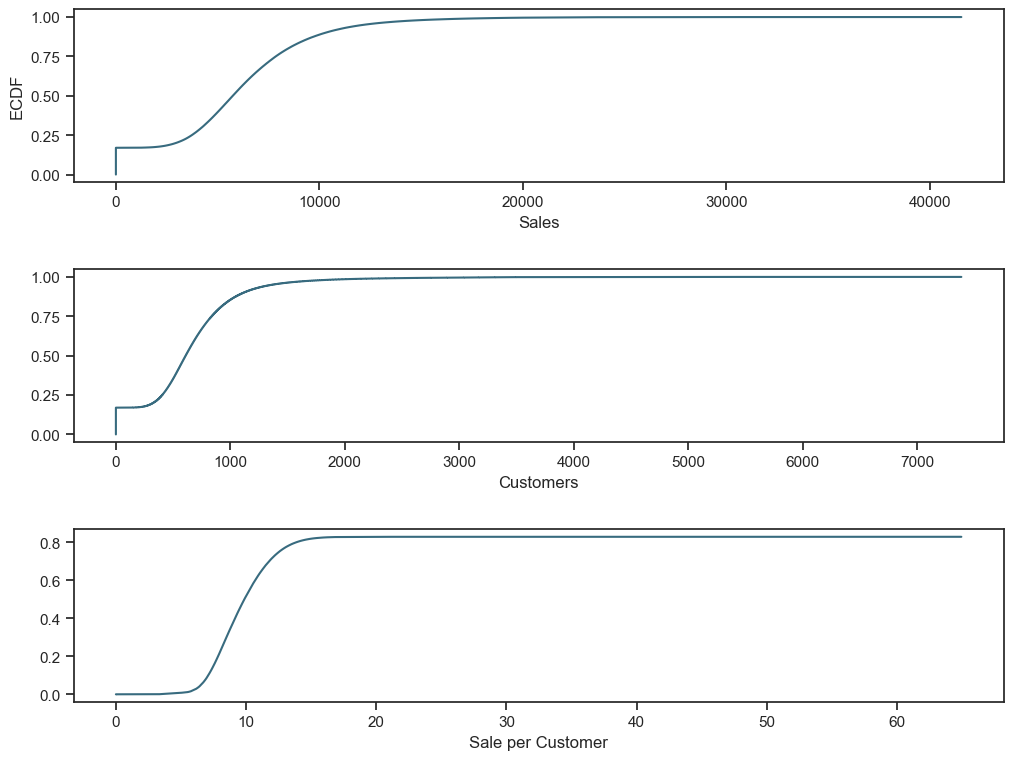

In [10]:
sns.set(style = "ticks")
c = '#386B7F'
plt.figure(figsize = (12, 9))

plt.subplot(311)
cdf = ECDF(df_train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(df_train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(df_train['SalesPerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');


plt.subplots_adjust(hspace=0.5) 

### Approximately 20% of the data contains zero sales per customers

### Dataset contains stores that have closed, we need to remoe them as they will not be used in analysis

In [11]:
# number of stores that are closed[open=0] and have had sales=0
closed_store = ((df_train['Open'] == 0) & (df_train['Sales'] == 0)).sum()

print("Number of Closed stores: ", closed_store)

Number of Closed stores:  172817


### 172,817 stores out of 1,017,209 are closed and had zero sales.
### This is about 15% of the records, hence it needs to be remove as it will provide a biased forecast.

### we will find out stores that are open and have zero sales

In [12]:
open_nosale = ((df_train['Open'] == 1) & (df_train['Sales'] == 0)).sum()
print("Number of stores that are open but had no sale: ", open_nosale)

Number of stores that are open but had no sale:  54


In [13]:
# df_train['DayOfWeek'].value_counts()

In [14]:
weekdays_df = df_train[(df_train['DayOfWeek'] >= 1) & (df_train['DayOfWeek'] <= 5)]

# Filter further to include only rows where 'Sales' is 0
zero_sales_df = weekdays_df[weekdays_df['Sales'] == 0]

# Group by 'DayOfWeek' and count the number of stores with 0 sales on each weekday
stores_with_zero_sales = zero_sales_df.groupby('DayOfWeek').size()

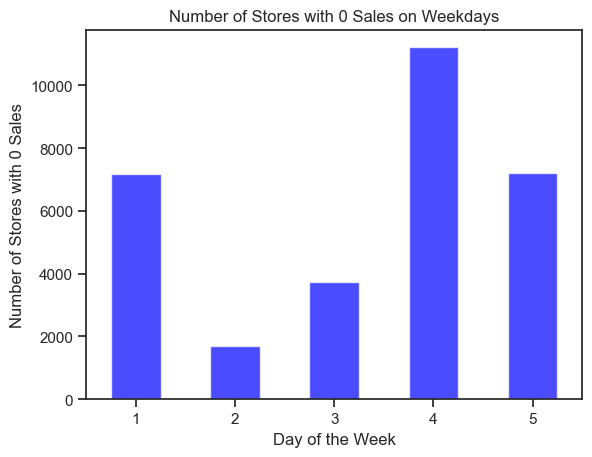

In [15]:
stores_with_zero_sales.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Stores with 0 Sales')
plt.title('Number of Stores with 0 Sales on Weekdays')
plt.xticks(rotation=0) 
plt.show()

### We see there are large number of stores that were open but had zero sales during weekdays. 

### We will discard this data as well during forecasting

In [16]:
# number of stores that are open and don't have zero sales

open_sale1 = ((df_train["Open"] != 0) & (df_train['Sales'] != 0)).sum()

print("Number of stores that are open and have sales greater that 0: ", open_sale1)

Number of stores that are open and have sales greater that 0:  844338


In [60]:
# train.head()

### let's explore store dataset

In [ ]:
df_store.head()
# df_train.columns

- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
df_store.shape

In [ ]:
# find null values

df_store.isnull().sum()

In [ ]:
# missing values in CompetitionDistance
df_store[pd.isnull(df_store.CompetitionDistance)]

In [ ]:
# imputing missing values in CompetitionDistance with median value

df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

#### if there's no Promo2 then there's no information about it. 
#### We can replace these values by zeros. The same goes for tha variables deducted from the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [ ]:
# replace NA's by 0
df_store.fillna(0, inplace = True)

#### Joining train set with an additional store information

In [22]:
# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

In total:  (1017209, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


#### Store Types

In [23]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


#### StoreType B seems to have the highest average of Sales among all others, however we have much less data for it. 

In [24]:
#overall sum of Sales and Customers to see which StoreType is the most selling and crowded one

train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


#### stores type A and type D have highest w.r.t both Sales and Customers

### Sales trend on a monthly basis

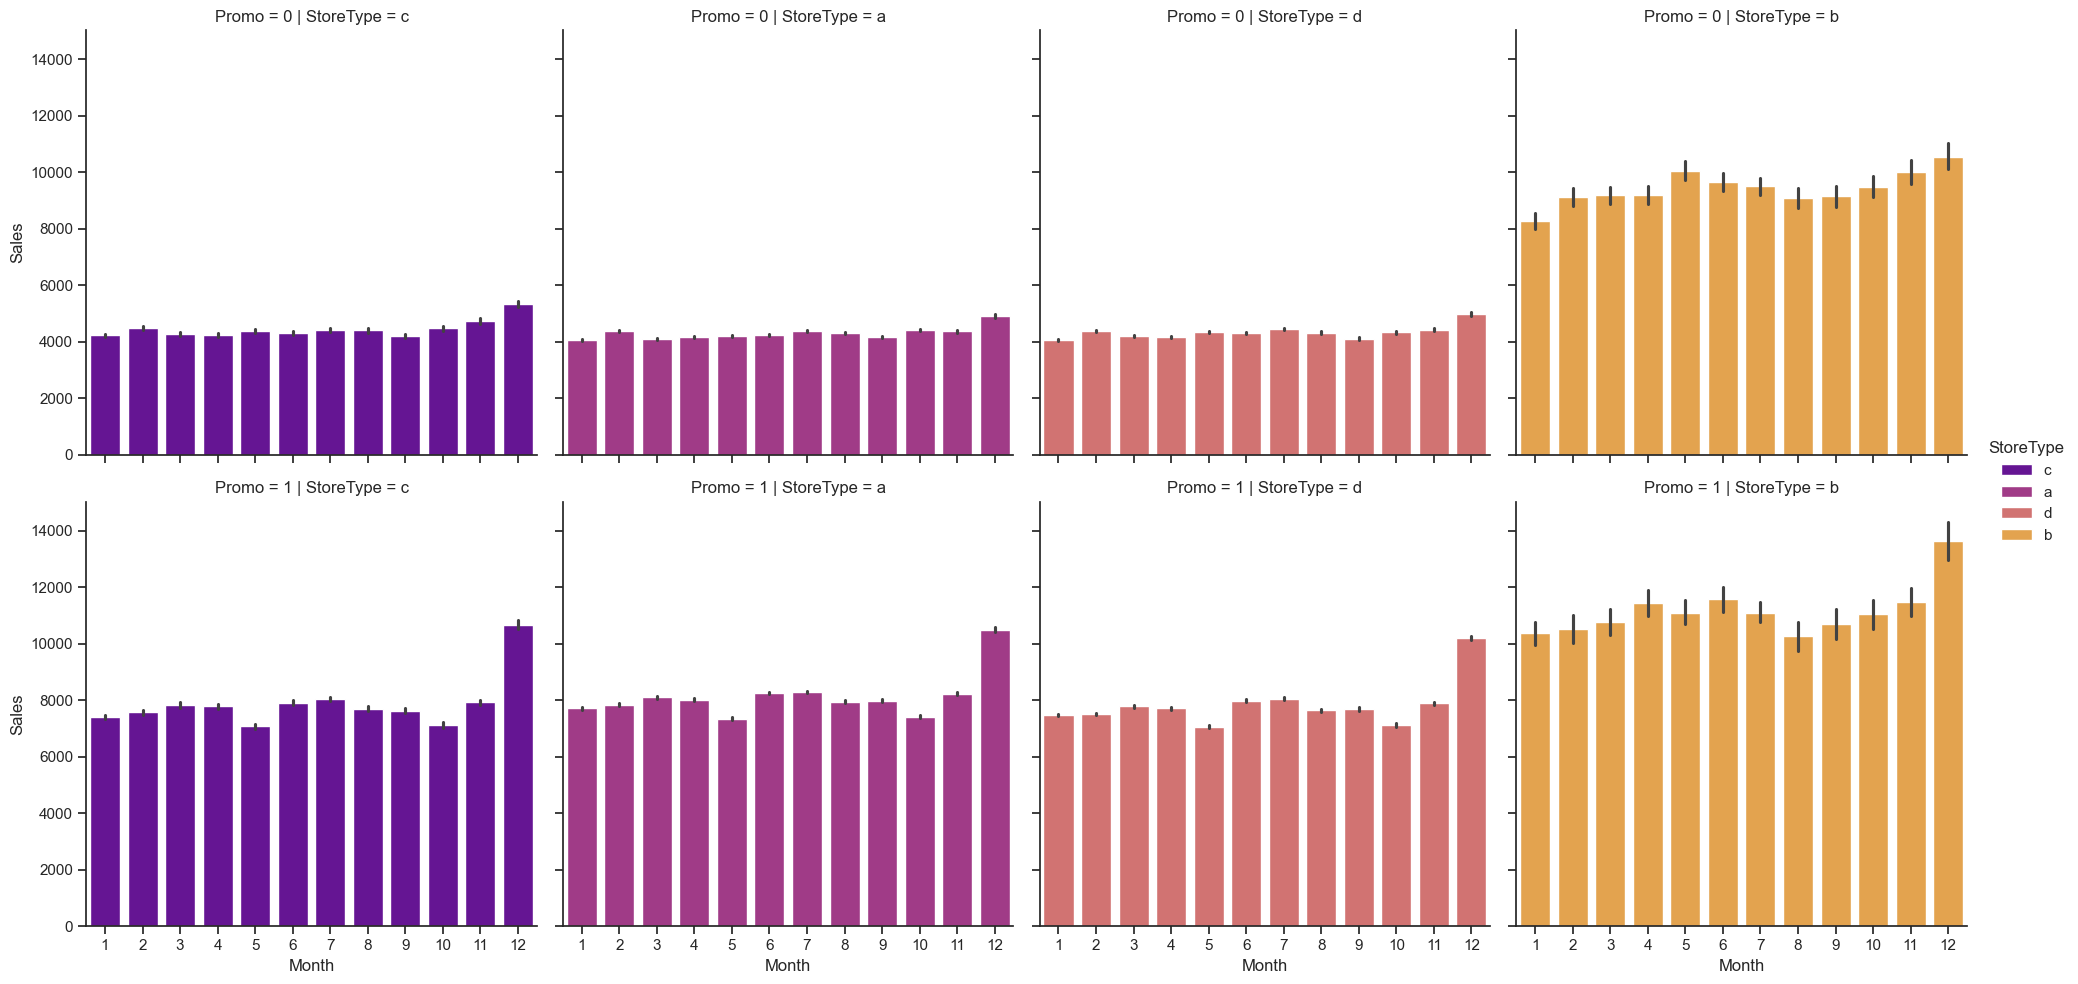

In [25]:
sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               kind = 'bar',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

plt.show()

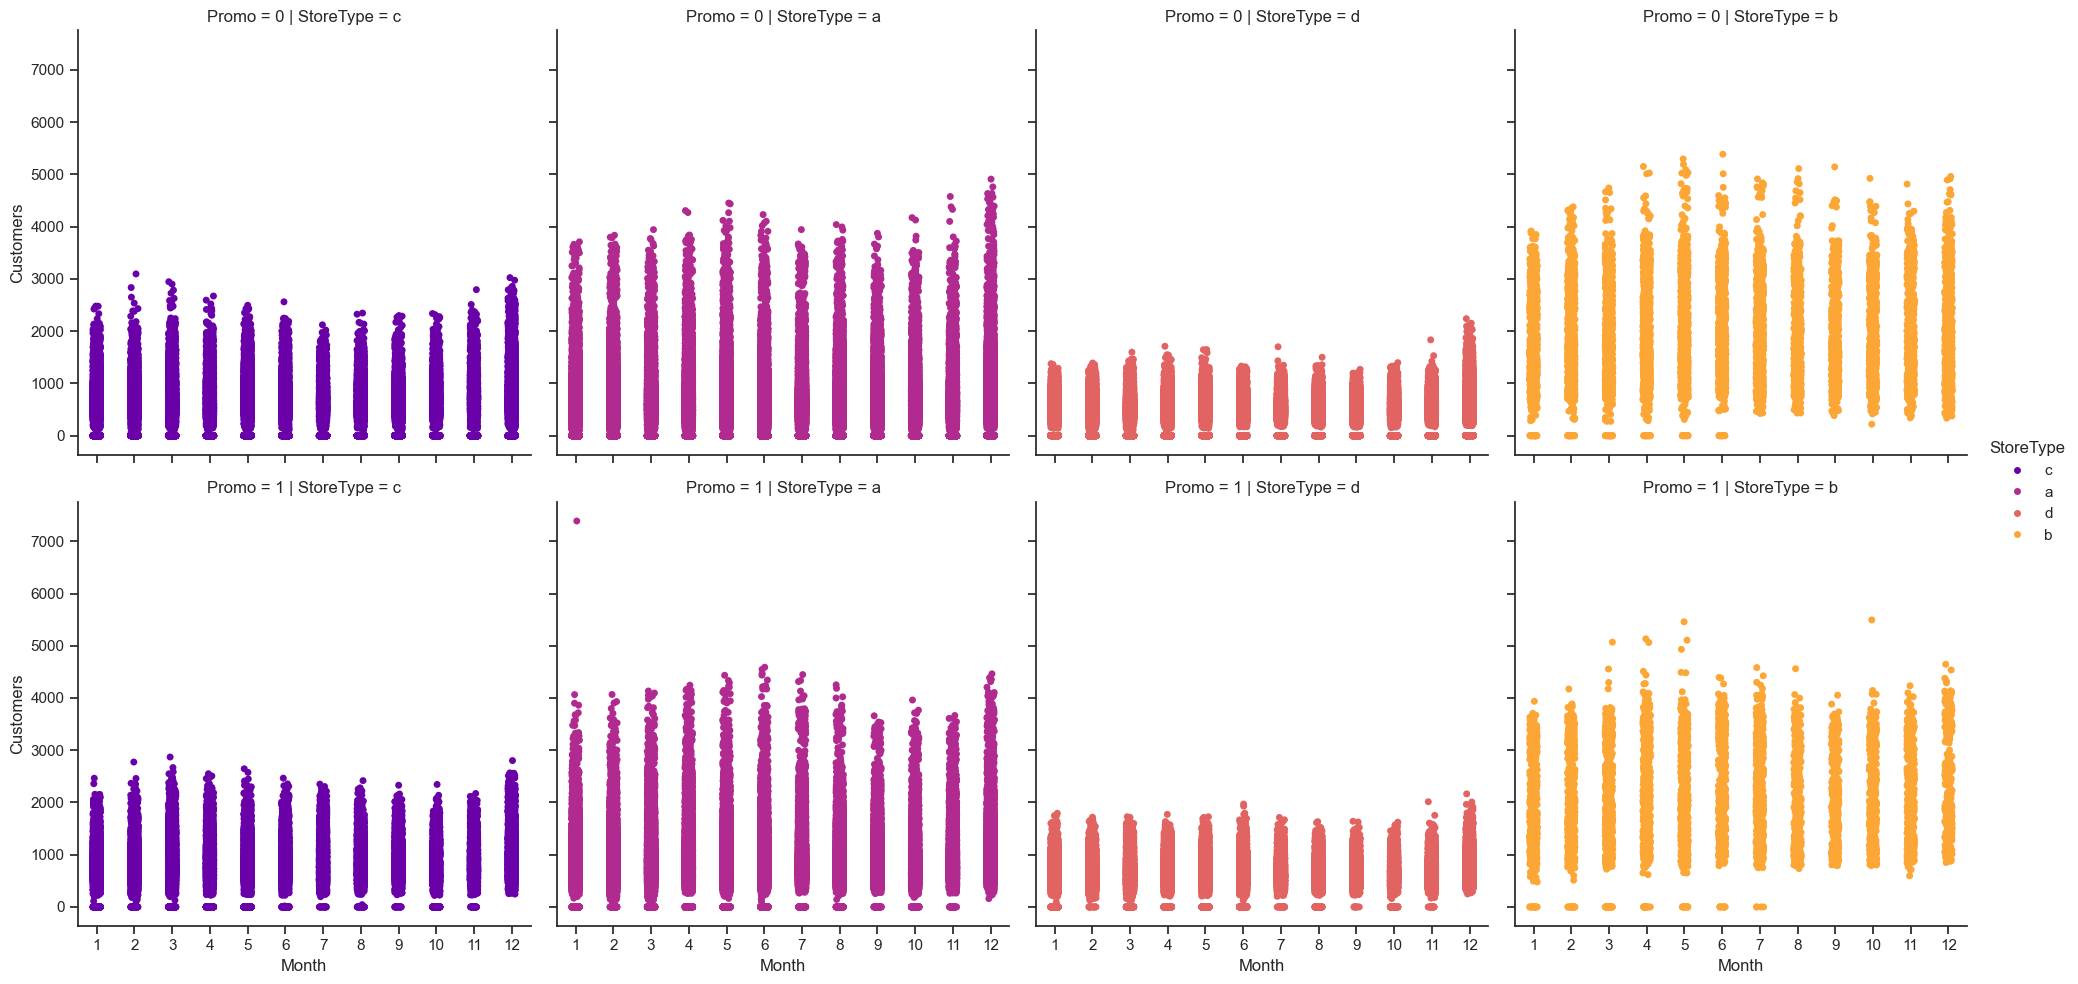

In [26]:
# sales trends w.r.t  Customer
sns.catplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

### All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for storetype B).

###  from both the graphs we observe that Sales escalate towards end of the year

### SalePerCustomer on monthly basis

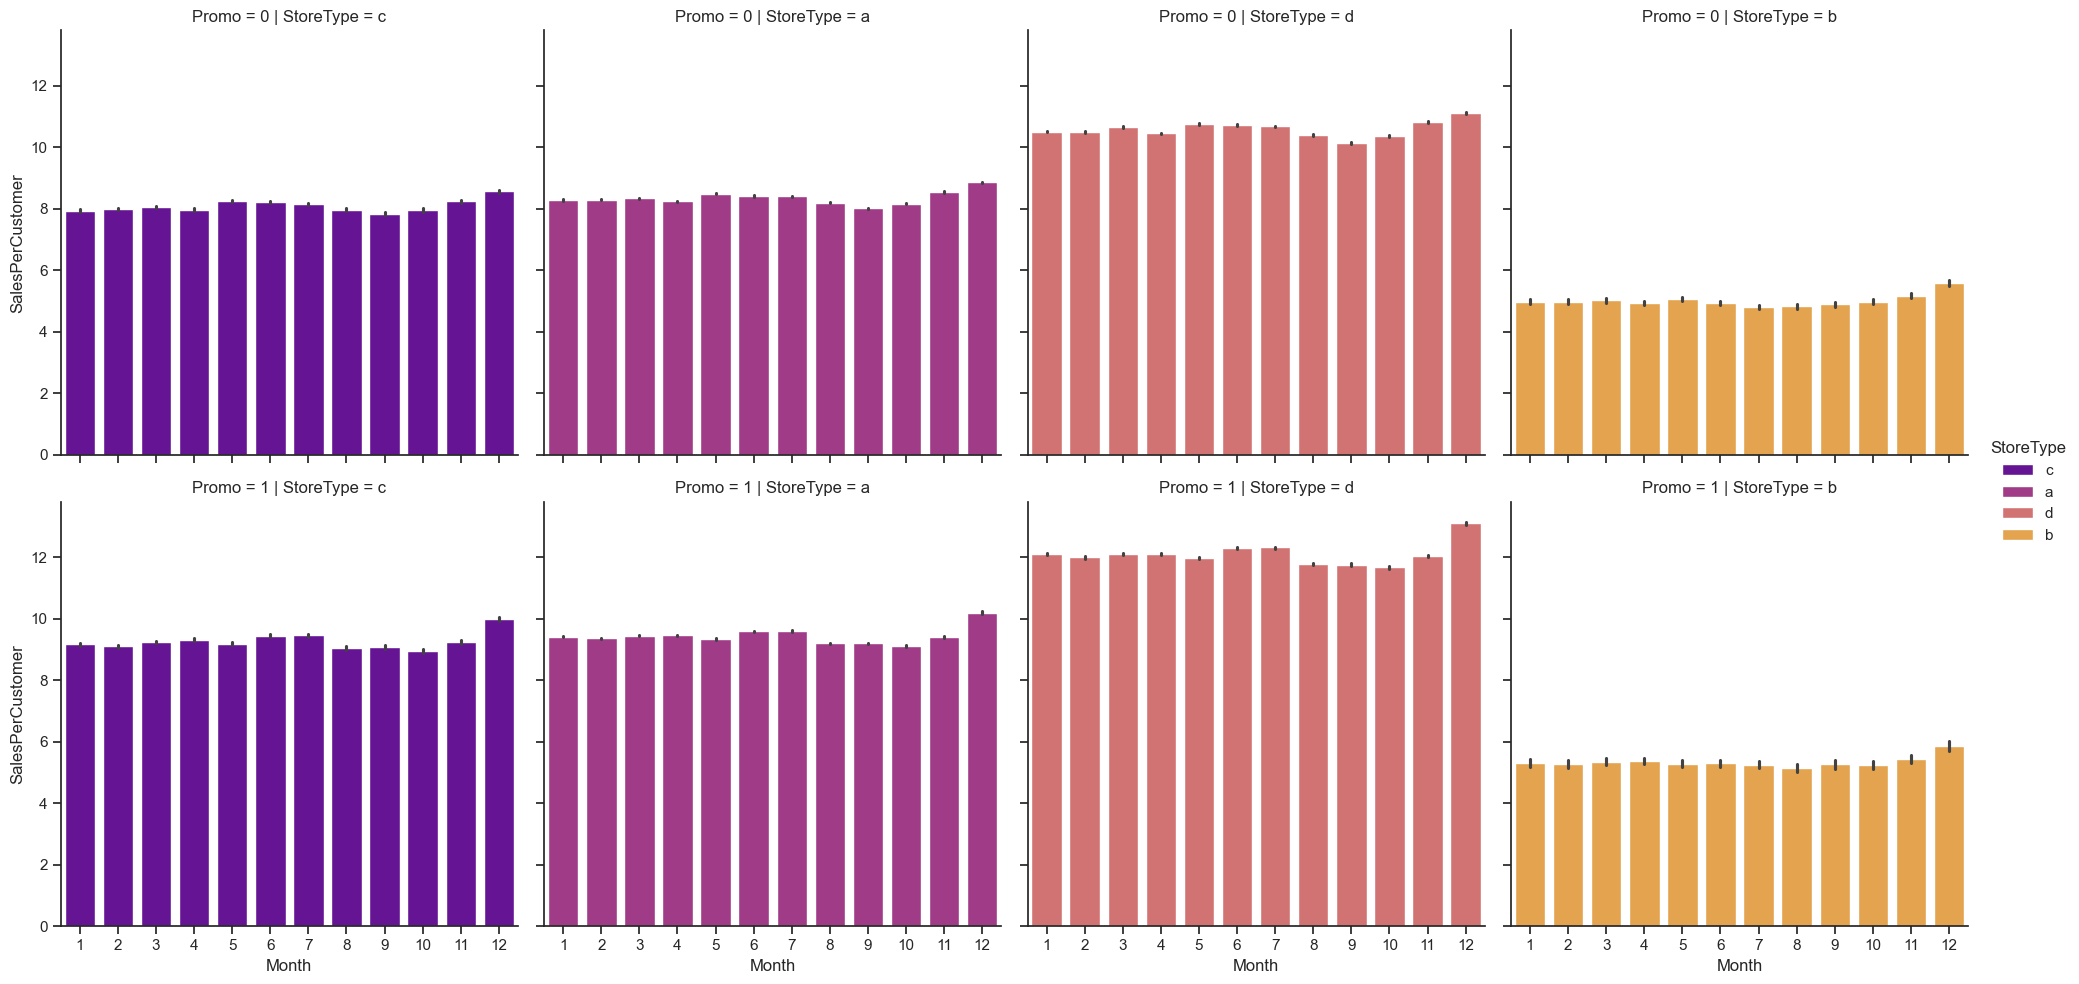

In [27]:
sns.catplot(data = train_store, x = 'Month', y = "SalesPerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               kind = 'bar',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

### The highest SalePerCustomer amount is observed at the StoreType D, about with Promo

In [28]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

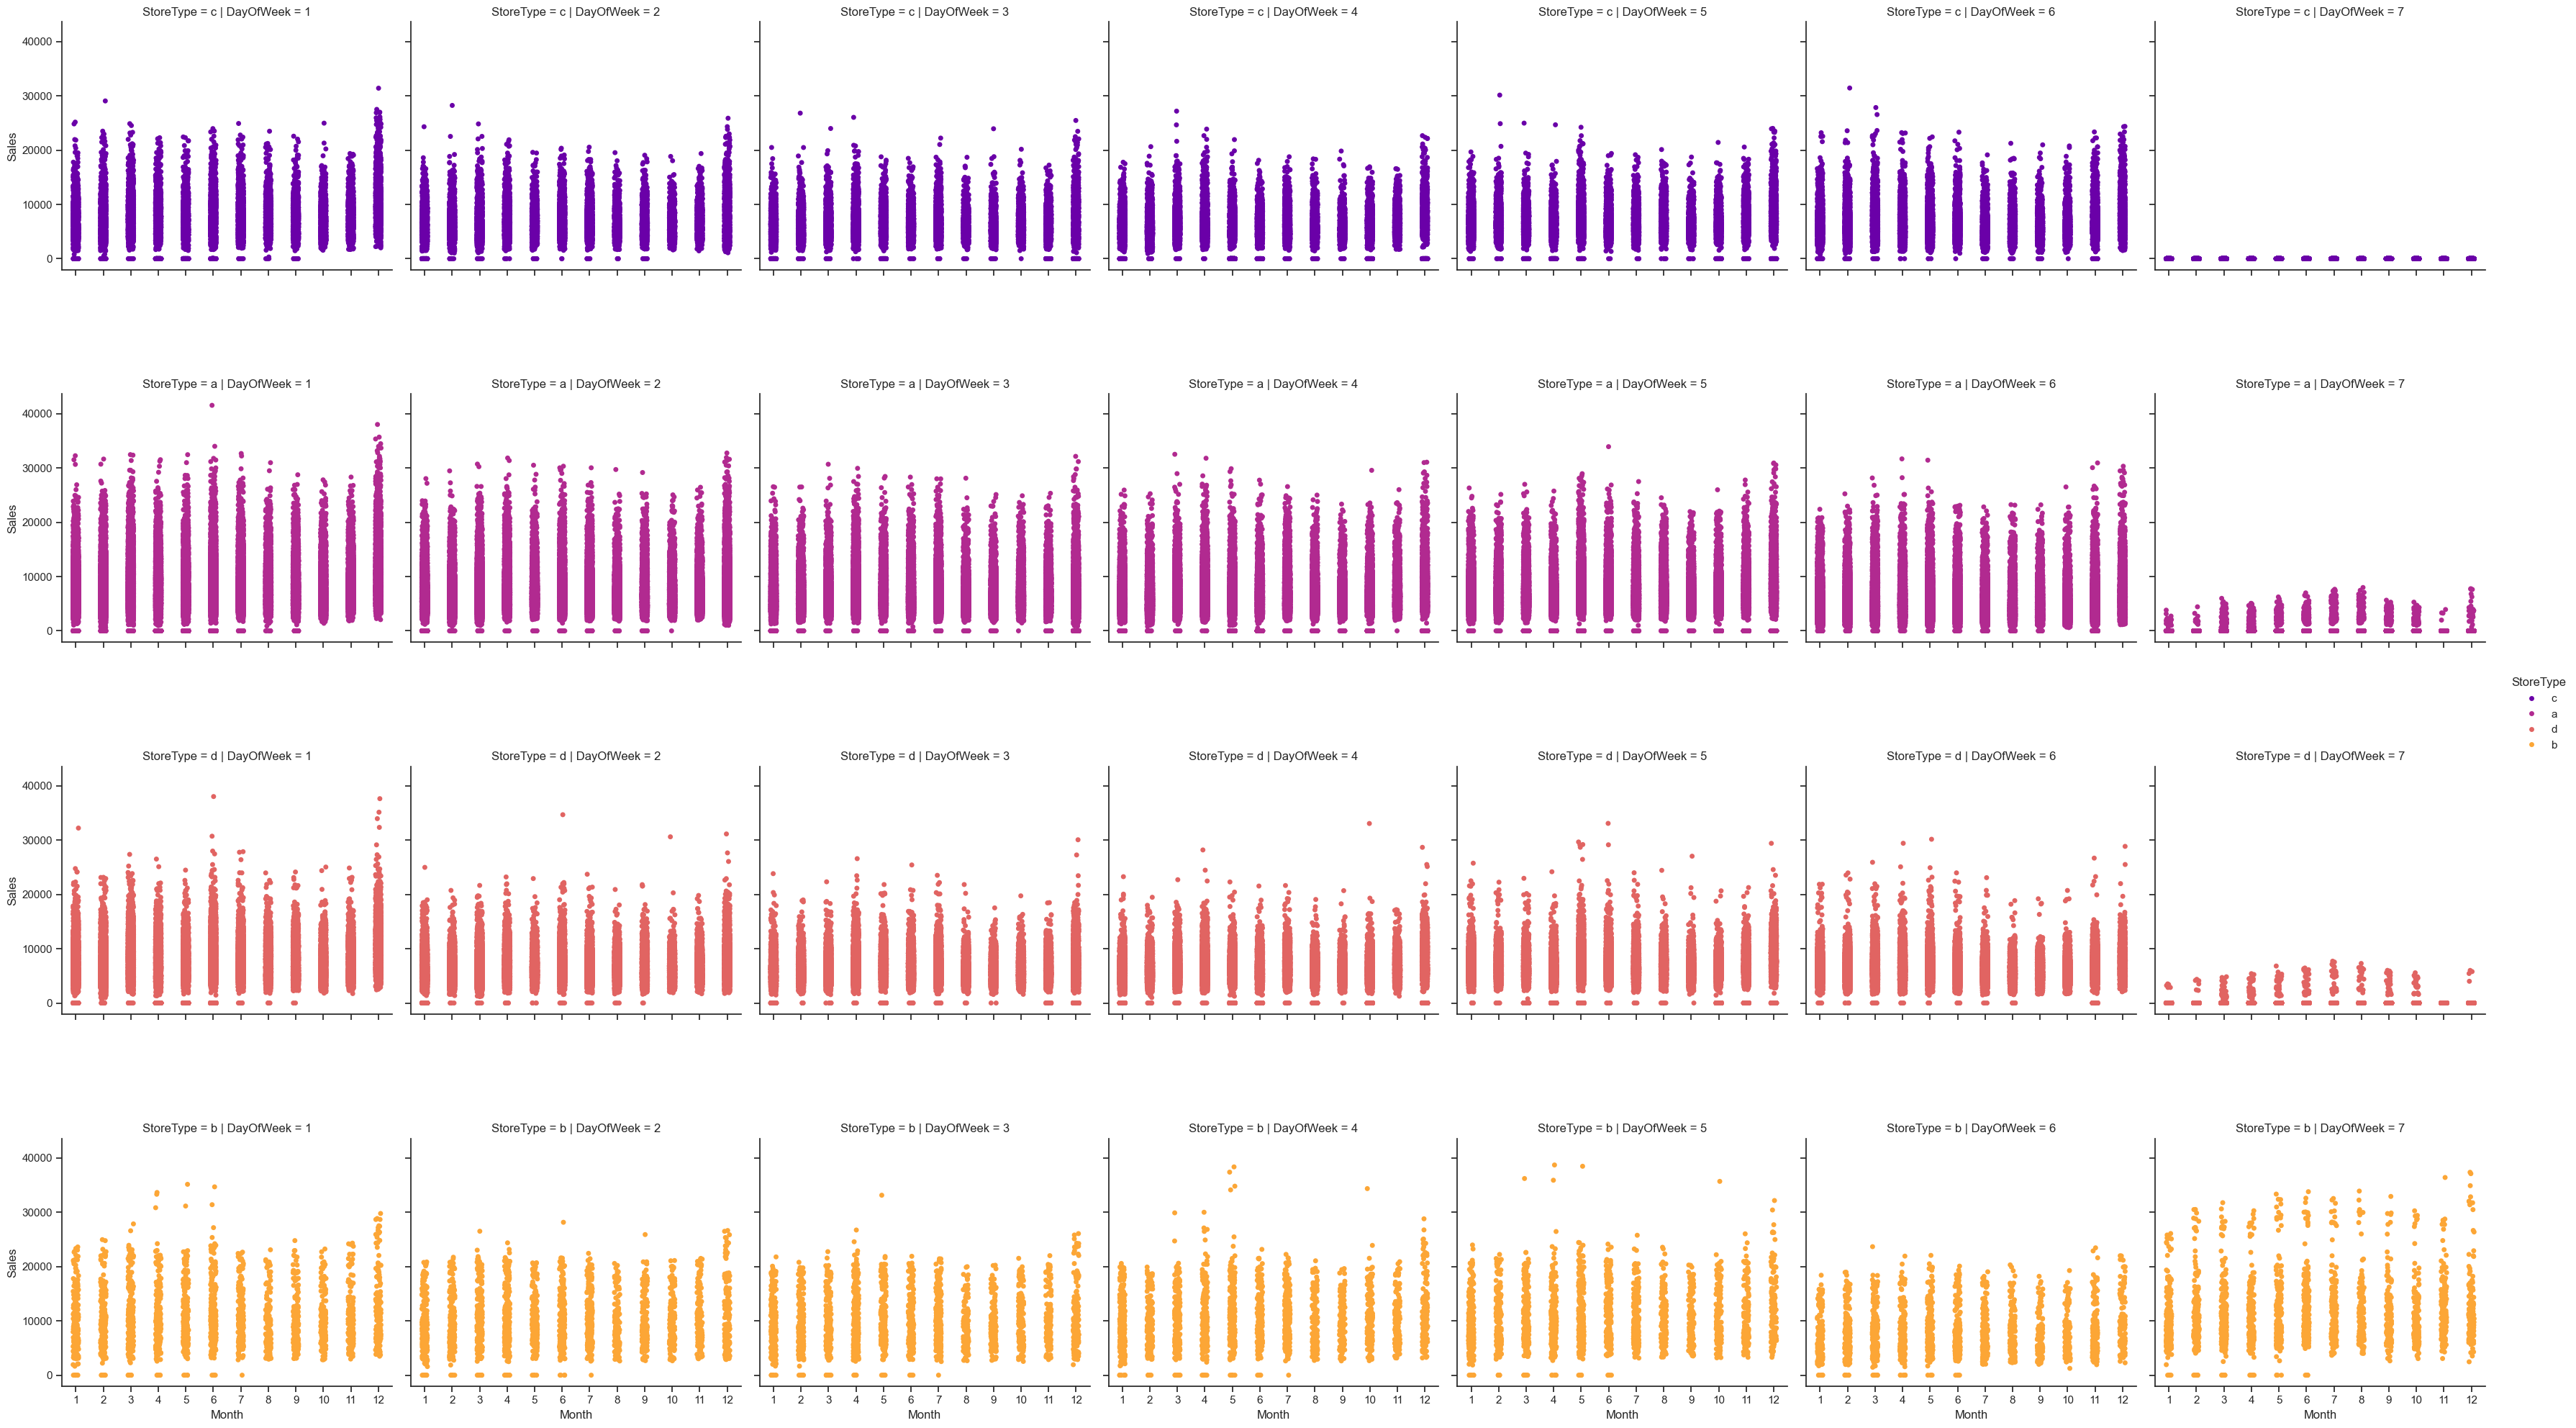

In [29]:
sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
#                kind = 'bar',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c) 

plt.subplots_adjust(hspace=0.5) 

### From these graphs we can infer that:
#### StoreType b has the highest sale on Sundays
#### StoreType a and d has similar sales but is below 1000
#### StoreType c has no sales on Sundays, store remains closed on weekends

In [30]:
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

In [31]:
# train_store[(train_store.DayOfWeek == 7) & (train_store.StoreType == 'c') & (train_store.Sales > 0)]

### Add variables describing the period of time during which competition and promotion were opened

In [32]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,5738.179710,659.034880,10.989818,43.484770
b,10058.837334,1987.720846,3.652369,38.567530
c,5723.629246,673.265894,13.978489,45.398831
d,5641.819243,501.434892,14.856226,35.304514


StoreType A, despite being the top performer in terms of sales and customer traffic, surprisingly isn't the most heavily impacted by competitors. In contrast, it's StoreType B and it has the longest promotional campaign duration

## Correlational Analysis

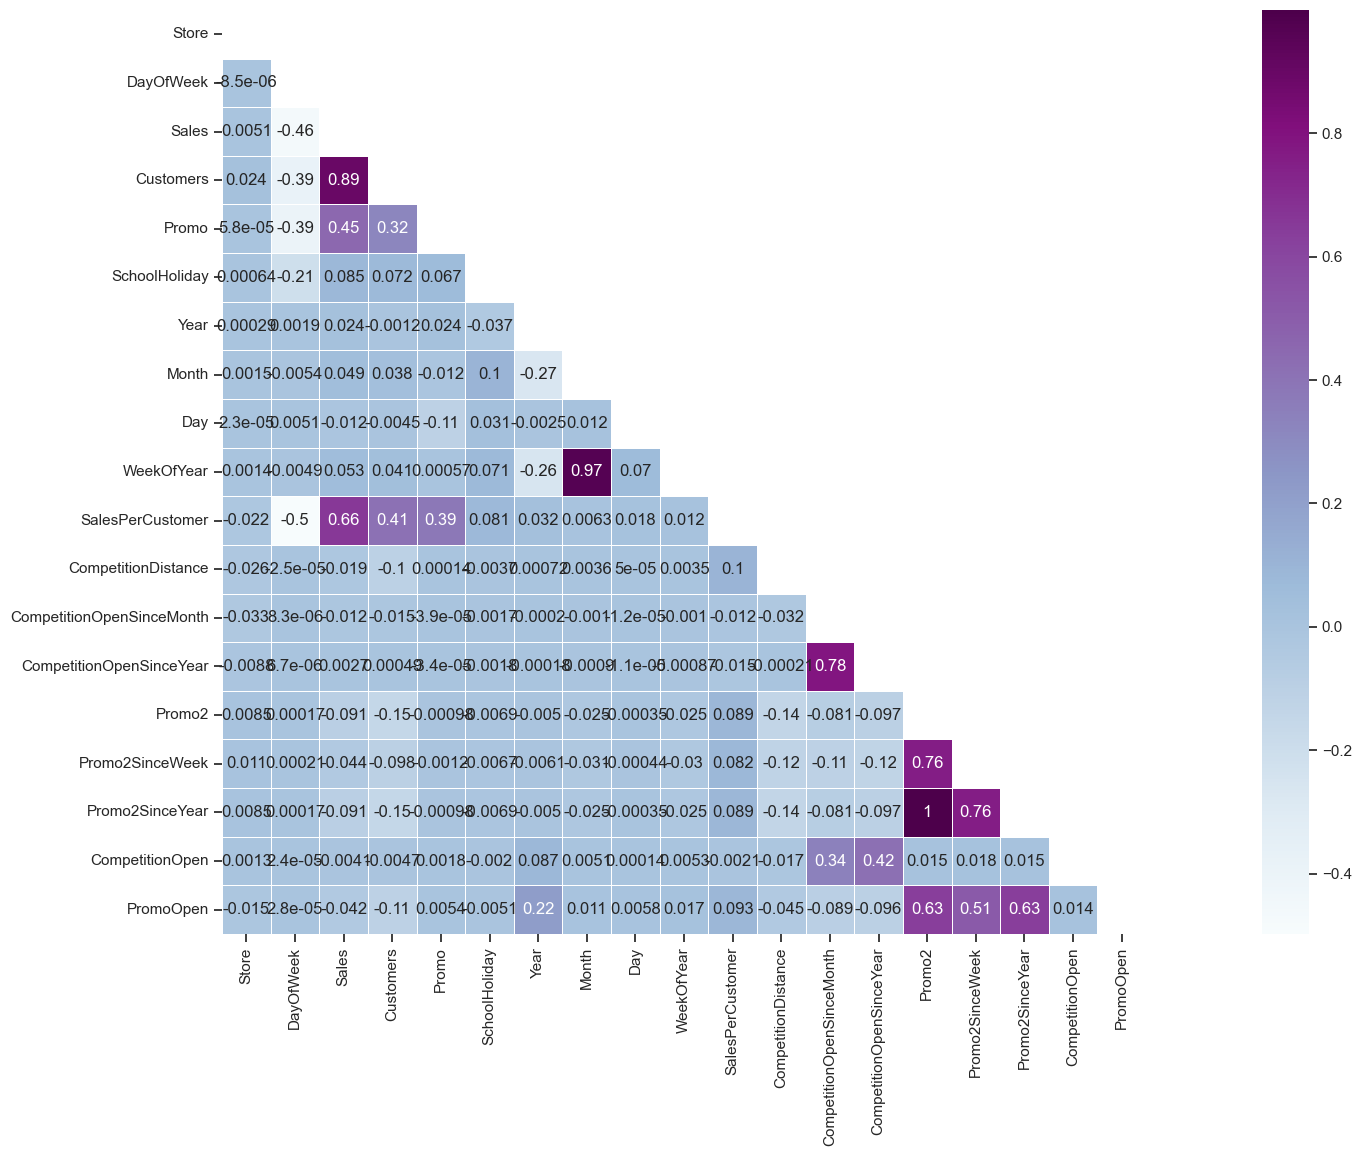

In [33]:
# Exclude the 'Open' variable
corr_all = train_store.drop('Open', axis=1).corr()

mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 12))

sns.heatmap(corr_all, mask=mask, annot=True, 
            square=True, linewidths=.5, ax=ax, cmap="BuPu")
plt.show()

- There's a strong positive correlation between a store's Sales and the number of Customers.
- We also notice a positive correlation when a store runs a standard promotion (Promo equals 1) and the number of Customers.
- However, when a store runs a continuous promotion (Promo2 equals 1), the number of Customers and Sales tends to plateau or even decrease, resulting in a pale negative correlation on the heatmap.
- This negative correlation is also observed between the presence of promotions in the store and the specific day of the week

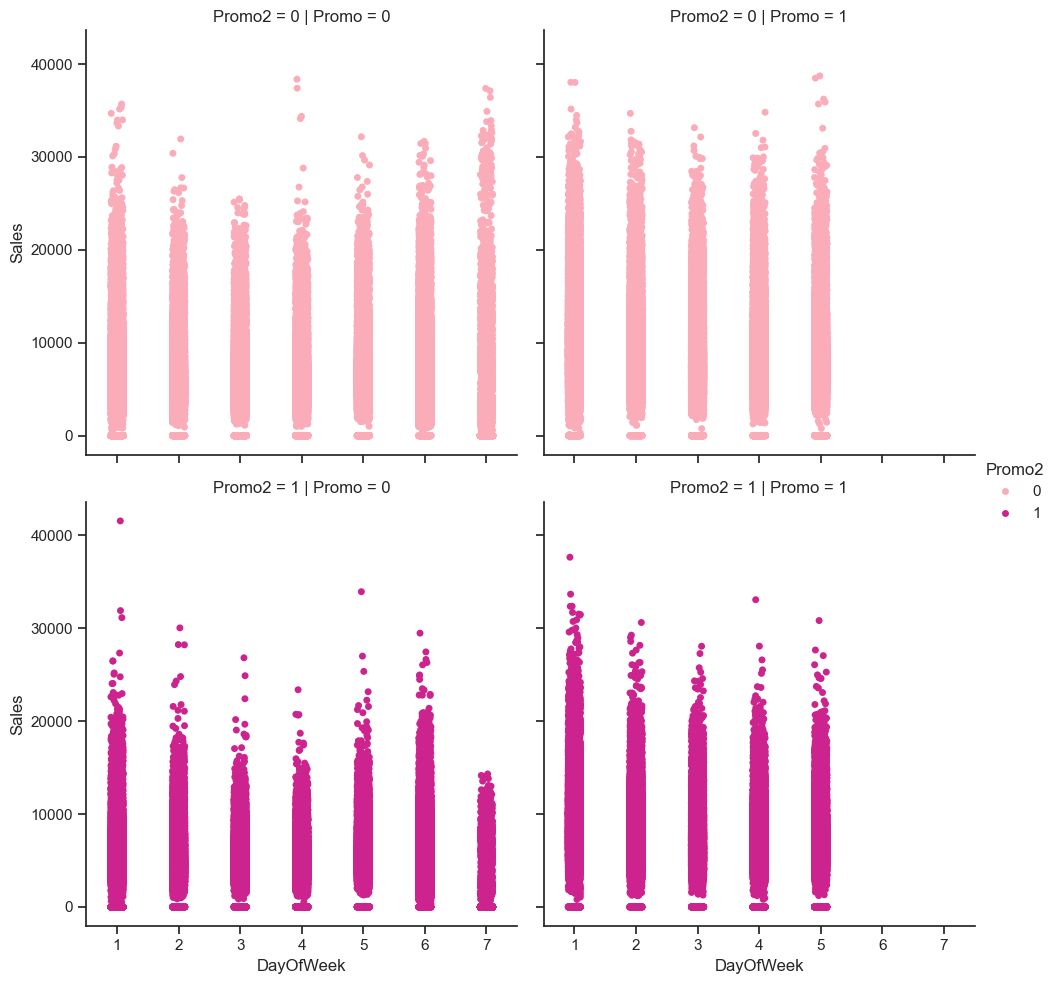

In [34]:
# sale per customer trends
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

- When there is no promotion (both Promo and Promo2 are equal to 0), Sales typically reach their highest levels on Sundays. It's important to note that StoreType C doesn't operate on Sundays, so the data mainly comes from StoreType A, B, and D.

- On the flip side, stores that run promotions tend to achieve their highest sales on Mondays. This observation could serve as a valuable insight for Rossmann's marketing campaigns. This same trend is followed by stores that have both types of promotions simultaneously (Promo and Promo2 are both equal to 1).

- Interestingly, Promo2 alone doesn't appear to be strongly correlated with any significant change in the Sales amount. This observation is supported by the lack of a distinct pattern (represented by the blue pale area) on the heatmap.

## Time-Series Analysis per Store Type

### Seasonality

We take four stores from store types to represent their group:

- Store number 2 for StoreType A
- Store number 85 for StoreType B
- Store number 1 for StoreType C
- Store number 13 for StoreType D

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Store             1017209 non-null  int64  
 1   DayOfWeek         1017209 non-null  int64  
 2   Sales             1017209 non-null  int64  
 3   Customers         1017209 non-null  int64  
 4   Open              1017209 non-null  int64  
 5   Promo             1017209 non-null  int64  
 6   StateHoliday      1017209 non-null  object 
 7   SchoolHoliday     1017209 non-null  int64  
 8   Year              1017209 non-null  int64  
 9   Month             1017209 non-null  int64  
 10  Day               1017209 non-null  int64  
 11  WeekOfYear        1017209 non-null  int64  
 12  SalesPerCustomer  844340 non-null   float64
dtypes: float64(1), int64(11), object(1)
memory usage: 108.6+ MB


In [36]:
# we will get the store ids with highest sales for each store type

max_sales_stores = train_store.groupby('StoreType')['Sales'].idxmax()

# Use the indices to get the corresponding store IDs
result = train_store.loc[max_sales_stores, ['StoreType', 'Store', 'Sales']]

print(result)

       StoreType  Store  Sales
827591         a    909  41551
237517         b    262  38722
510729         c    560  31448
51506          d     57  38037


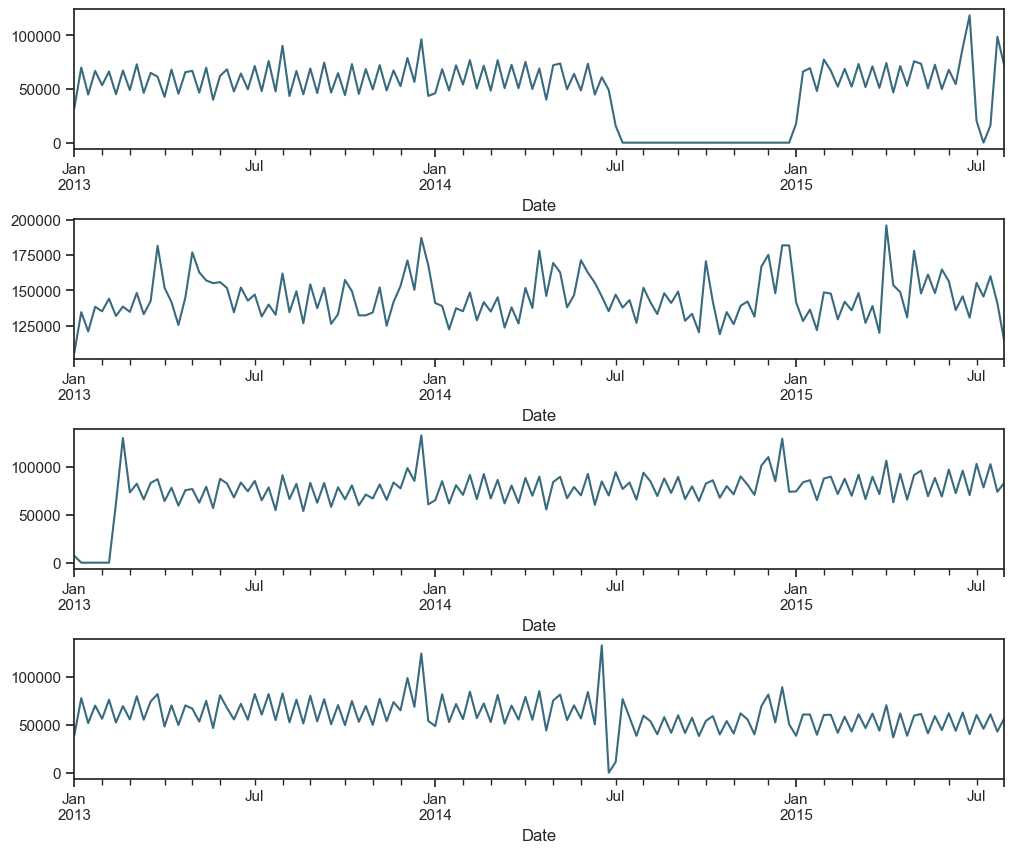

In [37]:
# let's see the trend for each store

# convert sales column to float type
df_train['Sales'] = df_train['Sales'] * 1.0

# store types
sales_a = df_train[df_train.Store == 909]['Sales']
sales_b = df_train[df_train.Store == 262]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = df_train[df_train.Store == 560]['Sales']
sales_d = df_train[df_train.Store == 57]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 10))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)


plt.subplots_adjust(hspace=0.5) 

##### All store have a trend that they peak toward the end of the year.
##### StoreType a has no information from July 2014 to January 2015, we will consider the store closed.
##### StoreType D and B, take a small peak around mid of the year.

### Yearly Trends

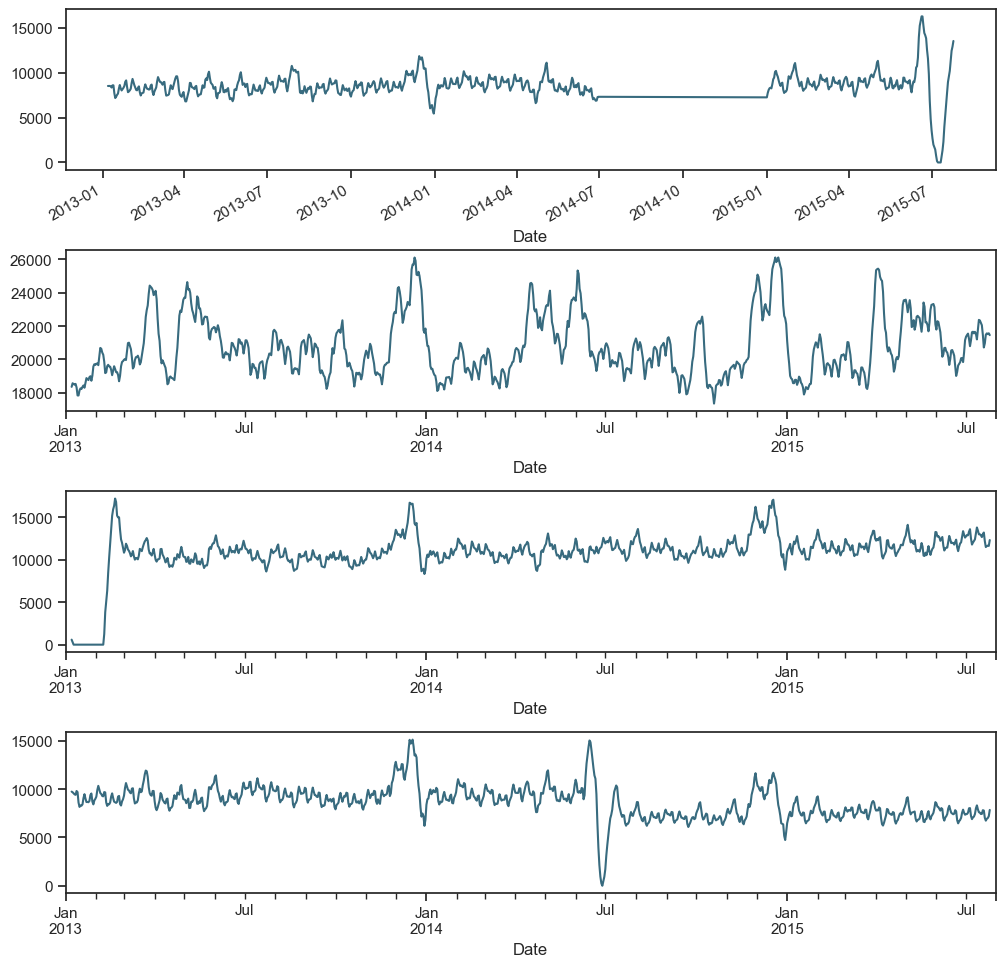

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', period = 12)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', period = 12)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', period = 12)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', period = 12)
decomposition_d.trend.plot(color = c, ax = ax4)

plt.subplots_adjust(hspace=0.5)

### All stores have a steady growth
### A peculiar observation is that each store has a spike in sale towards the end of the year(Nov and Dec) due to festive season and then the sale declines at the start of the year.
### Store B has major fluctuations and are likely to occur due to promotional activities as StoreB has the longest promotional campaing running.

### Store C has a steady growth trajectory while storeD has had a fall in sale during June and July 2014.

In [61]:
# train_store.to_csv('dataset/train_store.csv', index=False)

In [ ]:
dtrain = xgb.DMatrix(X_train[predictors], y_train)
dtest = xgb.DMatrix(X_test[predictors], y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(params, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, feval = rmspe_xg, verbose_eval = True)